In [39]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [40]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
FOLDER_PATH = 'Chinese-Herbs-Dataset'

In [41]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    FOLDER_PATH,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  # Fixed size to match IMAGE_SIZE
    batch_size=BATCH_SIZE
)

Found 190 files belonging to 19 classes.


In [42]:
class_names = dataset.class_names
print("Class Names:", class_names)
# Check dataset
print("Number of batches:", tf.data.experimental.cardinality(dataset).numpy())

Class Names: ['Coix Seed', 'Cordyceps Sinensis', 'Fructus Amomi', 'Glossy Ganoderma', 'Lily', 'Liquorice', 'Lotus Seed', 'Phaseolus Calcaratus', 'Poris Cocos', 'Radix Angelicae Dahuricae', 'Red Dates', 'Rhizoma Atractylodis Macrocephalae', 'Rhubarb', 'Scaphium Scaphigerum', 'Semen Dolichos', 'Siraitia Grosvenorii', 'Star Anise', 'Tremella', 'Unibract Fritillary Bulb']
Number of batches: 6


In [43]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[ 2  2 15  9  2  7  4 12 14  6 10 16 16  5  1  8 17  2  7 10 18  8  0  7
 16  0  9  7 15 12  0  4]


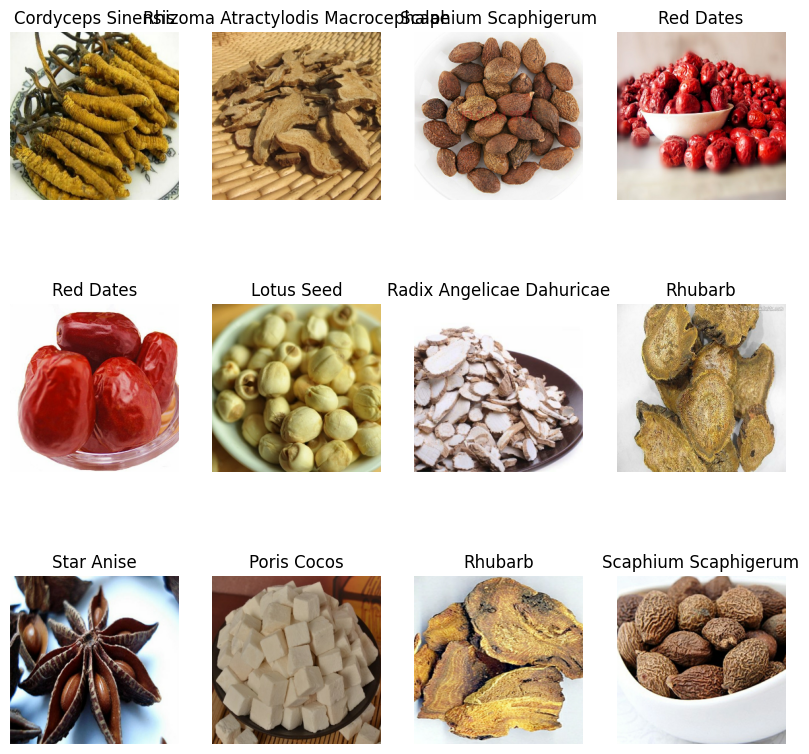

In [44]:
# Visualizing images with correct labels
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype('int'))
        plt.axis('off')
        plt.title(class_names[labels[i].numpy()])  # Fixed class name access
plt.show()

In [45]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = tf.data.experimental.cardinality(ds).numpy()  # Get dataset size
    print("Dataset size:", ds_size)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds

In [46]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Dataset size: 6


In [47]:
# Resizing and normalizing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Fixed resizing
    layers.Rescaling(1./255),
])


In [48]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [49]:
n_classes = len(class_names)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


c:\Users\PMLS\Desktop\Projects\data science\dj-dl-plant-herb\env\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [50]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 19)             │         1,235 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,787 (721.82 KB)

 Trainable params: 184,787 (721.82 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Ensured labels are integers
    metrics=['accuracy']
)

In [52]:
# Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.0340 - loss: 2.9525   
Epoch 2/50


c:\Users\PMLS\Desktop\Projects\data science\dj-dl-plant-herb\env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 913ms/step - accuracy: 0.0612 - loss: 2.9434
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 898ms/step - accuracy: 0.0688 - loss: 2.9424
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 953ms/step - accuracy: 0.0417 - loss: 2.9437
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 853ms/step - accuracy: 0.0806 - loss: 2.9364
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 891ms/step - accuracy: 0.0340 - loss: 2.9354
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 943ms/step - accuracy: 0.0716 - loss: 2.9265
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 879ms/step - accuracy: 0.0716 - loss: 2.9101
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0906 - loss: 2.8816  
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 874ms/step - accuracy: 0.1724 - loss: 2.8063
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 921ms/step - accuracy: 0.0917 - loss: 2.7770
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 945ms/step - accuracy: 0.1850 - loss: 2.5830
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 844ms/step - accuracy: 0.2107 - loss: 2.5872


In [59]:
scores = model.evaluate(test_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.9479 - loss: 0.1118


In [54]:
scores

[0.24811676144599915, 0.921875]

In [55]:
history

In [56]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 4}

In [57]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
from PIL import Image
import numpy as np
image_path = "Herb\Phaseolus Calcaratus\Phaseolus Calcaratus_0.jpg" 
image = Image.open(image_path)
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)

predictions=model.predict(img_array)

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\PMLS\AppData\Local\Temp\ipykernel_7076\332657348.py:3: SyntaxWarning: invalid escape sequence '\P'
  image_path = "Chinese-Herbs-Dataset\Phaseolus Calcaratus\Phaseolus Calcaratus_0.jpg"


array([[6.8712198e-18, 7.4694580e-03, 6.8611407e-05, 7.4807660e-10,
        2.5730811e-08, 4.6328317e-08, 3.0054433e-12, 9.8993605e-01,
        1.4124945e-16, 1.7084226e-14, 9.3784984e-05, 5.5325486e-09,
        8.3670711e-05, 4.0424005e-08, 4.3135977e-12, 2.9345026e-11,
        2.3478868e-03, 6.1473900e-13, 4.2886447e-07]], dtype=float32)

In [63]:
predicted_class = class_names[np.argmax(predictions)]
print (predicted_class)
print (np.max(predictions))

Phaseolus Calcaratus
0.98993605


In [64]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


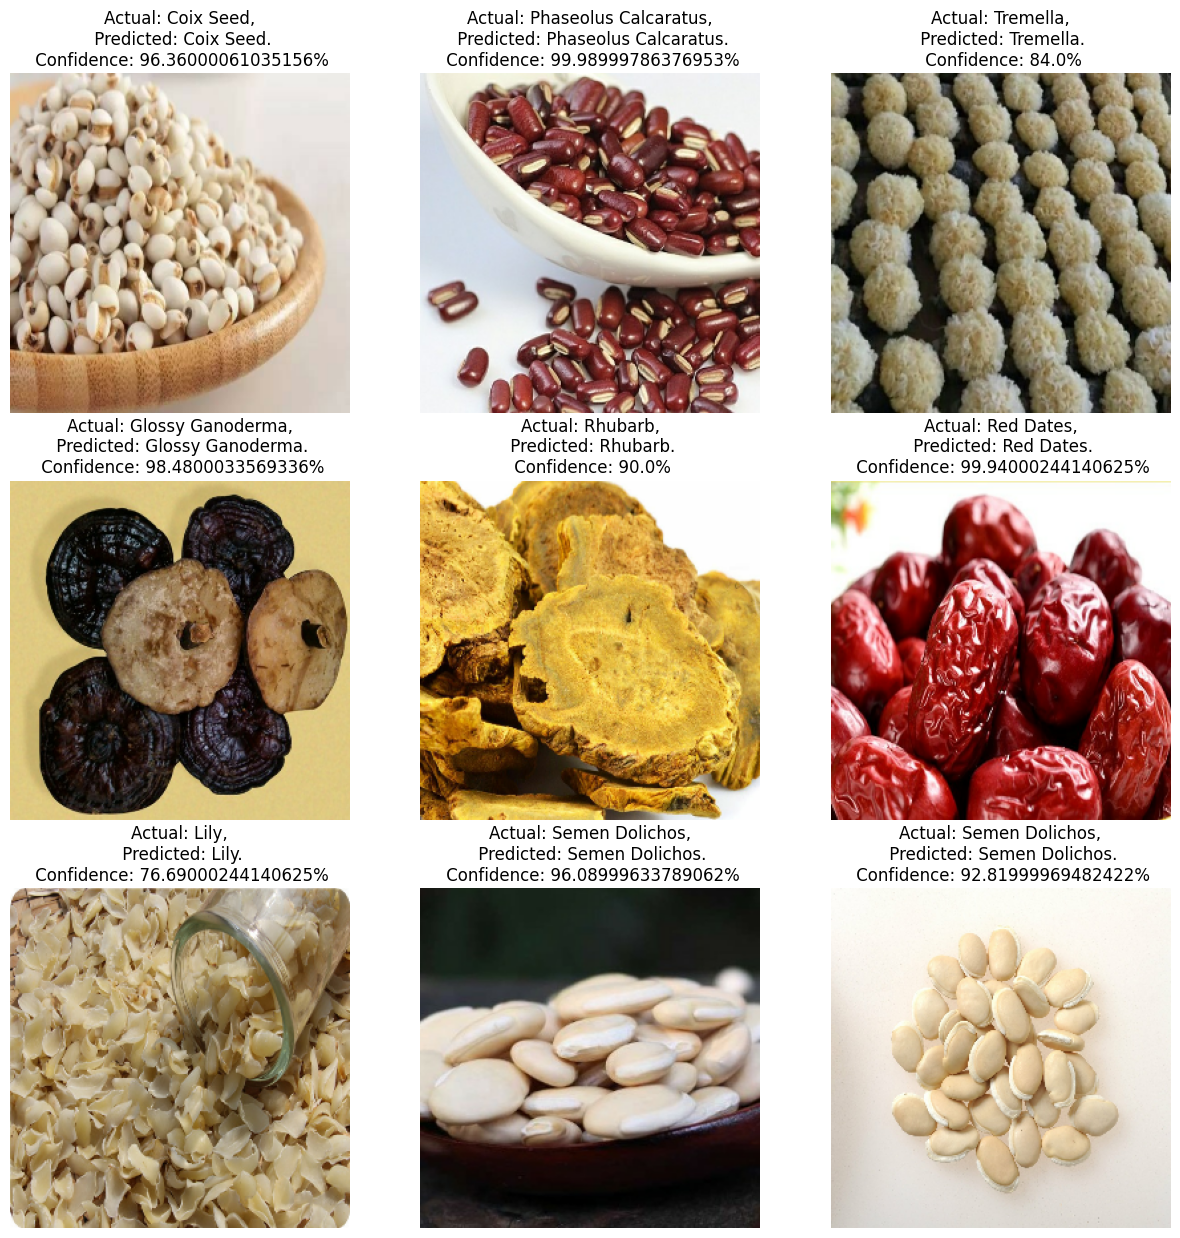

In [65]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [66]:
model.save("herb.h5")  
